# Covid-19 Daily Deaths - UK

Via: https://www.england.nhs.uk/statistics/statistical-work-areas/covid-19-daily-deaths/

At the moment, each time this script runs it downloads all the daily datafiles and builds the db from scratch. We need to optimise things so that only new daily files are parsed and added, incrementally, to the database.

In [1]:
import sqlite_utils
#!rm nhs_dailies.db
DB = sqlite_utils.Database("nhs_dailies.db")
processed = DB['processed']
# Start on a mechanism for only downloading things we haven't already grabbed
# Need a better way to handle query onto table if it doesn't exist yet
try:
    already_processed = pd.read_sql("SELECT * FROM processed", DB.conn)['reference'].to_list()
except:
    already_processed = []
    
already_processed  

rm: nhs_dailies.db: No such file or directory


[]

Daily reports are published as an Excel spreadhseet linked from the following page:

In [2]:
# Reporting page
url = 'https://www.england.nhs.uk/statistics/statistical-work-areas/covid-19-daily-deaths/'

Load the page:

In [2]:
import requests

page = requests.get(url)

NameError: name 'url' is not defined

In [3]:
from bs4 import BeautifulSoup, SoupStrainer

soup = BeautifulSoup(page.text)

NameError: name 'page' is not defined

Get the HTML page data into a form we can scrape it:

## ONS

Death registrations, 2020: https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/causesofdeath/datasets/deathregistrationsandoccurrencesbylocalauthorityandhealthboard

Weekly Death registrations (provisional):
https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales


### Weekly deaths, ONS:

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup, SoupStrainer

In [5]:
base='https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales'
page = requests.get(base, allow_redirects=True)
soup = BeautifulSoup(page.text, 'lxml')
links = {}
lahtable_link = ''
for link in soup.find_all('a'):
    if 'Download Deaths registered weekly' in link.text:
        lahtable_link = link.get('href')
        break
weeklytable_file = lahtable_link#.split('/')[-1]
weeklytable_file

'/file?uri=%2fpeoplepopulationandcommunity%2fbirthsdeathsandmarriages%2fdeaths%2fdatasets%2fweeklyprovisionalfiguresondeathsregisteredinenglandandwales%2f2020/publishedweek192020.xlsx'

In [6]:
ons_weekly_url = f'https://www.ons.gov.uk{weeklytable_file}'
print(ons_weekly_url)

https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fbirthsdeathsandmarriages%2fdeaths%2fdatasets%2fweeklyprovisionalfiguresondeathsregisteredinenglandandwales%2f2020/publishedweek192020.xlsx


In [7]:
r = requests.get(ons_weekly_url)

fn = ons_weekly_url.split('/')[-1]

print('Writing file...')
with open(fn, 'wb') as f:
    f.write(r.content)
print('File written...')
try:
    ons_sheets = pd.read_excel(fn, sheet_name=None)
except:
    with open(fn) as f:
        print(f.read())
# What sheets are available in the spreadsheet
ons_sheet_names = ons_sheets.keys()
ons_sheet_names

Writing file...
File written...


odict_keys(['Analysis', 'Contents', 'Information', 'Terms and conditions', 'Weekly figures 2020', 'Covid-19 - Weekly registrations', 'Covid-19 - Weekly occurrences', 'UK - Covid-19 - Weekly reg', 'Covid-19 - E&W comparisons', 'Covid-19 - England comparisons', 'Covid-19 - Wales comparison', 'Covid-19 - Place of occurrence ', 'Related publications'])

In [8]:
print('To here 1..')
ons_weekly_reg = ons_sheets['Covid-19 - Weekly registrations']
ons_weekly_reg.head()

,Contents,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
0,Weekly provisional figures on deaths registere...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Note that up-to-date counts of the total numbe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Week number,NaN,1,2,3,4,5,6,7,8,...,44,45,46,47,48,49,50,51,52,53
4,Week ended,NaN,2020-01-03 00:00:00,2020-01-10 00:00:00,2020-01-17 00:00:00,2020-01-24 00:00:00,2020-01-31 00:00:00,2020-02-07 00:00:00,2020-02-14 00:00:00,2020-02-21 00:00:00,...,2020-10-30 00:00:00,2020-11-06 00:00:00,2020-11-13 00:00:00,2020-11-20 00:00:00,2020-11-27 00:00:00,2020-12-04 00:00:00,2020-12-11 00:00:00,2020-12-18 00:00:00,2020-12-25 00:00:00,2021-01-01 00:00:00


In [24]:
print('To here 2..')
ons_weekly_occ = ons_sheets['Covid-19 - Weekly occurrences']
print(ons_weekly_occ.head())

To here 2..
                                            Contents Unnamed: 1  \
0  Weekly provisional figures on death occurrence...        NaN   
1                                                NaN        NaN   
2  Note that up-to-date counts of the total numbe...        NaN   
3                                        Week number        NaN   
4                                         Week ended        NaN   

            Unnamed: 2           Unnamed: 3           Unnamed: 4  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                    1                    2                    3   
4  2020-01-03 00:00:00  2020-01-10 00:00:00  2020-01-17 00:00:00   

            Unnamed: 5           Unnamed: 6           Unnamed: 7  \
0                  NaN                  NaN                  NaN   
1                  NaN                  

In [10]:
print('To here 3..')
def ons_weeklies(ons_weekly, typ):
    ons_weekly_long = {}
    rows, cols = np.where(ons_weekly == 'Week ended')
    colnames = ons_weekly.iloc[rows[0]].tolist()
    colnames[1] = 'Age'
    print('to A')
    rows, cols = np.where(ons_weekly == 'Deaths by age group')
    print('to B', row, cols)
    _rows, _ = np.where(ons_weekly == '90+')
    _ix = rows[0]
    print('to C', _rows)
    tables = []


    #Get the first three tables - for Persons, Males and Females
    for r, c in zip(rows, cols):
        tables.append(ons_weekly.iloc[r-1, c].split()[0])
    print('to D')
    for r, _r, t in zip(rows, _rows, tables):
        ons_weekly_long[t] = ons_weekly.iloc[r+1: _r+1]
        ons_weekly_long[t].columns = colnames
        ons_weekly_long[t].dropna(axis=1, how='all', inplace=True)
        dropper = [c for c in ons_weekly_long[t].columns if 'to date' in str(c)]
        dropper = dropper + [c for c in ons_weekly_long[t].columns if '1 to' in str(c)]
        if dropper:
            ons_weekly_long[t].drop(columns=dropper, inplace=True)
        ons_weekly_long[t] = ons_weekly_long[t].melt(id_vars=['Age'], var_name='Date', value_name='value')
        ons_weekly_long[t]['measure'] = typ
        display(ons_weekly_long[t])
        ons_weekly_long[t]['Date'] = pd.to_datetime(ons_weekly_long[t]['Date'])

    ons_weekly_long['Any'] = pd.DataFrame()
    for t in tables:
        ons_weekly_long[t]['Group'] = t
        ons_weekly_long['Any'] = pd.concat([ons_weekly_long['Any'], ons_weekly_long[t]])
    
    ons_weekly_long['Any'].reset_index(inplace=True, drop=True)
    
    return ons_weekly_long

In [11]:
print('To here 4..')
ons_weekly_reg_long = ons_weeklies(ons_weekly_reg, 'Weekly registrations')
ons_weekly_reg_long['Females']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Age,Date,value,measure
0,<1,2020-01-03,0,Weekly registrations
1,1-4,2020-01-03,0,Weekly registrations
2,5-9,2020-01-03,0,Weekly registrations
3,10-14,2020-01-03,0,Weekly registrations
4,15-19,2020-01-03,0,Weekly registrations
...,...,...,...,...
375,70-74,2020-05-08,307,Weekly registrations
376,75-79,2020-05-08,464,Weekly registrations
377,80-84,2020-05-08,772,Weekly registrations
378,85-89,2020-05-08,835,Weekly registrations


,Age,Date,value,measure
0,<1,2020-01-03,0,Weekly registrations
1,1-4,2020-01-03,0,Weekly registrations
2,5-9,2020-01-03,0,Weekly registrations
3,10-14,2020-01-03,0,Weekly registrations
4,15-19,2020-01-03,0,Weekly registrations
...,...,...,...,...
375,70-74,2020-05-08,189,Weekly registrations
376,75-79,2020-05-08,276,Weekly registrations
377,80-84,2020-05-08,433,Weekly registrations
378,85-89,2020-05-08,380,Weekly registrations


,Age,Date,value,measure
0,<1,2020-01-03,0,Weekly registrations
1,1-4,2020-01-03,0,Weekly registrations
2,5-9,2020-01-03,0,Weekly registrations
3,10-14,2020-01-03,0,Weekly registrations
4,15-19,2020-01-03,0,Weekly registrations
...,...,...,...,...
375,70-74,2020-05-08,118,Weekly registrations
376,75-79,2020-05-08,188,Weekly registrations
377,80-84,2020-05-08,339,Weekly registrations
378,85-89,2020-05-08,455,Weekly registrations


,Age,Date,value,measure,Group
0,<1,2020-01-03,0,Weekly registrations,Females
1,1-4,2020-01-03,0,Weekly registrations,Females
2,5-9,2020-01-03,0,Weekly registrations,Females
3,10-14,2020-01-03,0,Weekly registrations,Females
4,15-19,2020-01-03,0,Weekly registrations,Females
...,...,...,...,...,...
375,70-74,2020-05-08,118,Weekly registrations,Females
376,75-79,2020-05-08,188,Weekly registrations,Females
377,80-84,2020-05-08,339,Weekly registrations,Females
378,85-89,2020-05-08,455,Weekly registrations,Females


In [12]:
ons_weekly_reg_long['Any']

,Age,Date,value,measure,Group
0,<1,2020-01-03,0,Weekly registrations,Persons
1,1-4,2020-01-03,0,Weekly registrations,Persons
2,5-9,2020-01-03,0,Weekly registrations,Persons
3,10-14,2020-01-03,0,Weekly registrations,Persons
4,15-19,2020-01-03,0,Weekly registrations,Persons
...,...,...,...,...,...
1135,70-74,2020-05-08,118,Weekly registrations,Females
1136,75-79,2020-05-08,188,Weekly registrations,Females
1137,80-84,2020-05-08,339,Weekly registrations,Females
1138,85-89,2020-05-08,455,Weekly registrations,Females


In [13]:
ons_weekly_occ

,Contents,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55
0,Weekly provisional figures on death occurrence...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Note that up-to-date counts of the total numbe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Week number,NaN,1,2,3,4,5,6,7,8,...,44,45,46,47,48,49,50,51,52,53
4,Week ended,NaN,2020-01-03 00:00:00,2020-01-10 00:00:00,2020-01-17 00:00:00,2020-01-24 00:00:00,2020-01-31 00:00:00,2020-02-07 00:00:00,2020-02-14 00:00:00,2020-02-21 00:00:00,...,2020-10-30 00:00:00,2020-11-06 00:00:00,2020-11-13 00:00:00,2020-11-20 00:00:00,2020-11-27 00:00:00,2020-12-04 00:00:00,2020-12-11 00:00:00,2020-12-18 00:00:00,2020-12-25 00:00:00,2021-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,"6 These figures represent death occurrences, t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,7ONS deaths by actual date of death – register...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
print('To here 5..')
ons_weekly_occ_long = ons_weeklies(ons_weekly_occ, 'Weekly occurrences')
ons_weekly_occ_long['Males']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Age,Date,value,measure
0,<1,2020-01-03,0,Weekly occurrences
1,1-4,2020-01-03,0,Weekly occurrences
2,5-9,2020-01-03,0,Weekly occurrences
3,10-14,2020-01-03,0,Weekly occurrences
4,15-19,2020-01-03,0,Weekly occurrences
...,...,...,...,...
375,70-74,2020-05-08,310,Weekly occurrences
376,75-79,2020-05-08,436,Weekly occurrences
377,80-84,2020-05-08,645,Weekly occurrences
378,85-89,2020-05-08,804,Weekly occurrences


,Age,Date,value,measure
0,<1,2020-01-03,0,Weekly occurrences
1,1-4,2020-01-03,0,Weekly occurrences
2,5-9,2020-01-03,0,Weekly occurrences
3,10-14,2020-01-03,0,Weekly occurrences
4,15-19,2020-01-03,0,Weekly occurrences
...,...,...,...,...
375,70-74,2020-05-08,192,Weekly occurrences
376,75-79,2020-05-08,262,Weekly occurrences
377,80-84,2020-05-08,355,Weekly occurrences
378,85-89,2020-05-08,349,Weekly occurrences


,Age,Date,value,measure
0,<1,2020-01-03,0,Weekly occurrences
1,1-4,2020-01-03,0,Weekly occurrences
2,5-9,2020-01-03,0,Weekly occurrences
3,10-14,2020-01-03,0,Weekly occurrences
4,15-19,2020-01-03,0,Weekly occurrences
...,...,...,...,...
375,70-74,2020-05-08,118,Weekly occurrences
376,75-79,2020-05-08,174,Weekly occurrences
377,80-84,2020-05-08,290,Weekly occurrences
378,85-89,2020-05-08,455,Weekly occurrences


,Age,Date,value,measure,Group
0,<1,2020-01-03,0,Weekly occurrences,Males
1,1-4,2020-01-03,0,Weekly occurrences,Males
2,5-9,2020-01-03,0,Weekly occurrences,Males
3,10-14,2020-01-03,0,Weekly occurrences,Males
4,15-19,2020-01-03,0,Weekly occurrences,Males
...,...,...,...,...,...
375,70-74,2020-05-08,192,Weekly occurrences,Males
376,75-79,2020-05-08,262,Weekly occurrences,Males
377,80-84,2020-05-08,355,Weekly occurrences,Males
378,85-89,2020-05-08,349,Weekly occurrences,Males


In [15]:
print('To here 6..')
ons_weekly_all = ons_sheets['Weekly figures 2020']
ons_weekly_all.head()

,Contents,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
0,Weekly provisional figures on deaths registere...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Note that up-to-date counts of the total numbe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Week number,NaN,1,2,3,4,5,6,7,8,...,44,45,46,47,48,49,50,51,52,53
4,Week ended,NaN,2020-01-03 00:00:00,2020-01-10 00:00:00,2020-01-17 00:00:00,2020-01-24 00:00:00,2020-01-31 00:00:00,2020-02-07 00:00:00,2020-02-14 00:00:00,2020-02-21 00:00:00,...,2020-10-30 00:00:00,2020-11-06 00:00:00,2020-11-13 00:00:00,2020-11-20 00:00:00,2020-11-27 00:00:00,2020-12-04 00:00:00,2020-12-11 00:00:00,2020-12-18 00:00:00,2020-12-25 00:00:00,2021-01-01 00:00:00


In [16]:
print('To here 7..')
ons_weekly_all_long = ons_weeklies(ons_weekly_all, 'Weekly all mortality')
ons_weekly_all_long['Males']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Age,Date,value,measure
0,<1,2020-01-03,48,Weekly all mortality
1,1-4,2020-01-03,8,Weekly all mortality
2,5-9,2020-01-03,4,Weekly all mortality
3,10-14,2020-01-03,4,Weekly all mortality
4,15-19,2020-01-03,6,Weekly all mortality
...,...,...,...,...
375,70-74,2020-05-08,1172,Weekly all mortality
376,75-79,2020-05-08,1528,Weekly all mortality
377,80-84,2020-05-08,2099,Weekly all mortality
378,85-89,2020-05-08,2441,Weekly all mortality


,Age,Date,value,measure
0,<1,2020-01-03,30,Weekly all mortality
1,1-4,2020-01-03,5,Weekly all mortality
2,5-9,2020-01-03,2,Weekly all mortality
3,10-14,2020-01-03,1,Weekly all mortality
4,15-19,2020-01-03,5,Weekly all mortality
...,...,...,...,...
375,70-74,2020-05-08,682,Weekly all mortality
376,75-79,2020-05-08,867,Weekly all mortality
377,80-84,2020-05-08,1112,Weekly all mortality
378,85-89,2020-05-08,1089,Weekly all mortality


,Age,Date,value,measure
0,<1,2020-01-03,18,Weekly all mortality
1,1-4,2020-01-03,3,Weekly all mortality
2,5-9,2020-01-03,2,Weekly all mortality
3,10-14,2020-01-03,3,Weekly all mortality
4,15-19,2020-01-03,1,Weekly all mortality
...,...,...,...,...
375,70-74,2020-05-08,490,Weekly all mortality
376,75-79,2020-05-08,661,Weekly all mortality
377,80-84,2020-05-08,987,Weekly all mortality
378,85-89,2020-05-08,1352,Weekly all mortality


,Age,Date,value,measure,Group
0,<1,2020-01-03,30,Weekly all mortality,Males
1,1-4,2020-01-03,5,Weekly all mortality,Males
2,5-9,2020-01-03,2,Weekly all mortality,Males
3,10-14,2020-01-03,1,Weekly all mortality,Males
4,15-19,2020-01-03,5,Weekly all mortality,Males
...,...,...,...,...,...
375,70-74,2020-05-08,682,Weekly all mortality,Males
376,75-79,2020-05-08,867,Weekly all mortality,Males
377,80-84,2020-05-08,1112,Weekly all mortality,Males
378,85-89,2020-05-08,1089,Weekly all mortality,Males


Add to database...

In [17]:
print('To here 8..')
_table = 'ons_deaths'

ons_weekly_occ_long['Any'].to_sql(_table, DB.conn, index=False, if_exists='append')
print('To here 9..')
ons_weekly_reg_long['Any'].to_sql(_table, DB.conn, index=False, if_exists='append')
print('To here 10..')
ons_weekly_all_long['Any'].to_sql(_table, DB.conn, index=False, if_exists='append')
print('To here 11..')

### ONS Death Registrations, 2020

https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/causesofdeath/datasets/deathregistrationsandoccurrencesbylocalauthorityandhealthboard

In [18]:
print('To here 12..')
base='https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/causesofdeath/datasets/deathregistrationsandoccurrencesbylocalauthorityandhealthboard'
page = requests.get(base, allow_redirects=True)
soup = BeautifulSoup(page.text, 'lxml')
links = {}
lahtable_link = ''
for link in soup.find_all('a'):
    if 'Download Death registrations and occurrences' in link.text:
        lahtable_link = link.get('href')
        break
lahtable_file = lahtable_link#.split('/')[-1]
lahtable_file

'/file?uri=%2fpeoplepopulationandcommunity%2fhealthandsocialcare%2fcausesofdeath%2fdatasets%2fdeathregistrationsandoccurrencesbylocalauthorityandhealthboard%2f2020/lahbtablesweek19.xlsx'

In [19]:
print('To here 13..')
ons_death_reg_url = f'https://www.ons.gov.uk{lahtable_file}'
ons_death_reg_url

'https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fhealthandsocialcare%2fcausesofdeath%2fdatasets%2fdeathregistrationsandoccurrencesbylocalauthorityandhealthboard%2f2020/lahbtablesweek19.xlsx'

In [20]:
print('To here 14..')
r = requests.get(ons_death_reg_url, allow_redirects=True)

fn = ons_death_reg_url.split('/')[-1]
 
with open(fn, 'wb') as f:
    f.write(r.content)

ons_reg_sheets = pd.read_excel(fn, sheet_name=None)

# What sheets are available in the spreadsheet
ons_reg_sheet_names = ons_reg_sheets.keys()
ons_reg_sheet_names

odict_keys(['Contents', 'Information', 'Terms and conditions', 'Registrations - All data', 'Registrations - Pivot table', 'Occurrences - All data', 'Occurrences - Pivot table'])

In [21]:
print('To here 15..')
ons_death_reg = ons_reg_sheets['Registrations - All data']
ons_death_reg_metadata = ons_death_reg.iloc[0, 0]
ons_death_reg_metadata

'Deaths (numbers) by local authority and cause of death, registered up to the 8th May 2020, England and Wales'

In [22]:
print('To here 16..')
from parse import parse
import dateparser

upto = parse('Deaths (numbers) by local authority and cause of death, registered up to the {date}, England and Wales',
             ons_death_reg_metadata)['date']
upto = dateparser.parse(upto)

rows, cols = np.where(ons_death_reg == 'Area code')
colnames = ons_death_reg.iloc[rows[0]].tolist()
    
ons_death_reg = ons_death_reg.iloc[rows[0]+1:].reset_index(drop=True)
ons_death_reg.columns = colnames


ons_death_reg['Registered up to'] = upto
ons_death_reg

,Area code,Geography type,Area name,Cause of death,Week number,Place of death,Number of deaths,Registered up to
0,E06000001,Local Authority,Hartlepool,All causes,1,Care home,8,2020-05-08
1,E06000001,Local Authority,Hartlepool,All causes,1,Elsewhere,0,2020-05-08
2,E06000001,Local Authority,Hartlepool,All causes,1,Home,2,2020-05-08
3,E06000001,Local Authority,Hartlepool,All causes,1,Hospice,0,2020-05-08
4,E06000001,Local Authority,Hartlepool,All causes,1,Hospital,18,2020-05-08
...,...,...,...,...,...,...,...,...
77222,W11000031,Health Board,Swansea Bay University Health Board,COVID 19,19,Elsewhere,0,2020-05-08
77223,W11000031,Health Board,Swansea Bay University Health Board,COVID 19,19,Home,0,2020-05-08
77224,W11000031,Health Board,Swansea Bay University Health Board,COVID 19,19,Hospice,0,2020-05-08
77225,W11000031,Health Board,Swansea Bay University Health Board,COVID 19,19,Hospital,17,2020-05-08


In [ ]:
print('To here 17..')
ons_death_occ = ons_reg_sheets['Occurrences - All data']
ons_death_occ_metadata = ons_death_occ.iloc[0, 0]
ons_death_occ_metadata

uptos = parse('Deaths (numbers) by local authority and cause of death, for deaths that occurred up to {date_occ} but were registered up to {date_reg}, England and Wales',
             ons_death_occ_metadata)

upto_occ = uptos['date_occ']
if '2020' not in upto_occ: upto_occ = f'{upto_occ} 2020'
    
upto_reg = uptos['date_reg']
if '2020' not in upto_occ: upto_occ = f'{upto_reg} 2020'

upto_occ = dateparser.parse(upto_occ)
upto_reg = dateparser.parse(upto_reg)

rows, cols = np.where(ons_death_occ == 'Area code')
colnames = ons_death_occ.iloc[rows[0]].tolist()
    
ons_death_occ = ons_death_occ.iloc[rows[0]+1:].reset_index(drop=True)
ons_death_occ.columns = colnames


ons_death_occ['Occurred up to'] = upto_occ
ons_death_occ['Registered up to'] = upto_reg
ons_death_occ

In [ ]:
print('To here 18..')
_table = 'ons_deaths_reg'
ons_death_reg.to_sql(_table, DB.conn, index=False, if_exists='replace')
print('To here 19..')
_table = 'ons_deaths_reg_occ'
ons_death_occ.to_sql(_table, DB.conn, index=False, if_exists='replace')
print('To here 20..')

Get the relevant links to the daily spreadseets:

In [5]:
links = {}
for link in soup.find("article", {"class": "rich-text"}).find_all('a'):
    if link.text.startswith('COVID 19 daily announced deaths'):
        if link.text not in links:
            links[link.text] = link.get('href')
    elif link.text.startswith('COVID 19 total announced deaths') and link.text.endswith('weekly tables'):
        weekly_totals_link =  link.get('href')
    elif link.text.startswith('COVID 19 total announced deaths'):
        totals_link =  link.get('href')
links

{'COVID 19 daily announced deaths 22 May 2020': 'https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/05/COVID-19-daily-announced-deaths-22-May-2020.xlsx',
 'COVID 19 daily announced deaths 21 May 2020': 'https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/05/COVID-19-daily-announced-deaths-21-May-2020.xlsx',
 'COVID 19 daily announced deaths 20 May 2020': 'https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/05/COVID-19-daily-announced-deaths-20-May-2020-1.xlsx',
 'COVID 19 daily announced deaths 19 May 2020': 'https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/05/COVID-19-daily-announced-deaths-19-May-2020.xlsx',
 'COVID 19 daily announced deaths 18 May 2020': 'https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/05/COVID-19-daily-announced-deaths-18-May-2020.xlsx',
 'COVID 19 daily announced deaths 17 May 2020': 'https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/05/COVID-19-da

In [4]:
import numpy as np
import pandas as pd

Start to sketch out how we can parse the data out of one of the spreadsheets. The following has been arrivied though a little bit of iteration an previewing of the data:

In [7]:
sheets = pd.read_excel(links['COVID 19 daily announced deaths 9 April 2020'],
                           sheet_name=None)

# What sheets are available in the spreadsheet
sheet_names = sheets.keys()
sheet_names

odict_keys(['COVID19 daily deaths by region', 'COVID19 daily deaths by age', 'COVID19 daily deaths by trust'])

The spreadsheet contains the following sheets:

- `COVID19 daily deaths by region`
- `COVID19 daily deaths by age`
- `COVID19 daily deaths by trust`


## Cleaning the Sheets

Clean the sheets to get the actual data:

In [8]:
sheet = 'COVID19 daily deaths by region'
sheets[sheet].head(15)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,NaN,Title:,COVID-19 daily deaths announcement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Summary:,Deaths of patients who have died in hospitals ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Period:,5pm 07 April 2020 - 5pm 08 April 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Source:,COVID-19 Patient Notification System,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Basis:,Provider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Published:,2020-04-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Revised:,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Status:,Published,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Contact:,england.nhsdata@nhs.net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We don't necessarily know how much metadata there is at the start of the sheet so we need to emply heuristics. If *NHS England Region* is used consistently as a column heading, we can use that as a crib:

In [9]:
rows, cols = np.where(sheets[sheet] == 'NHS England Region')
rows, cols

/usr/local/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


(array([12]), array([1]))

In [10]:
colnames = sheets[sheet].iloc[12]
sheets[sheet] = sheets[sheet].iloc[15:]
sheets[sheet].columns = colnames
sheets[sheet].dropna(axis=1, how='all', inplace=True)
sheets[sheet].dropna(axis=0, how='all', inplace=True)
#sheets[sheet].dropna(axis=0, subset=[sheets[sheet].columns[0]], inplace=True)
sheets[sheet].head()

12,NHS England Region,2020-03-16 00:00:00,2020-03-19 00:00:00,2020-03-20 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-26 00:00:00,2020-03-27 00:00:00,2020-03-28 00:00:00,...,2020-04-01 00:00:00,2020-04-02 00:00:00,2020-04-03 00:00:00,2020-04-04 00:00:00,2020-04-05 00:00:00,2020-04-06 00:00:00,2020-04-07 00:00:00,2020-04-08 00:00:00,Awaiting verification,Total
15,East Of England,0,0,0,0,0,0,0,0,0,...,1,7,2,8,15,15,42,20,0,113
16,London,1,2,0,2,1,2,2,6,5,...,7,10,15,16,12,25,61,29,0,213
17,Midlands,0,0,0,0,0,0,0,0,1,...,8,3,5,7,13,22,41,17,0,124
18,North East And Yorkshire,0,0,0,0,0,0,0,0,0,...,0,2,0,0,4,6,48,32,0,92
19,North West,0,0,0,0,0,0,0,0,0,...,2,4,6,4,2,6,35,18,0,77


The ages data is structured differently, but we can perhaps use *Age Group* as a crib?

In [11]:
sheet = 'COVID19 daily deaths by age'
sheets[sheet].head(25)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,NaN,Title:,COVID-19 daily deaths announcement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,AE_Closures,NaN,NaN,NaN,NaN,NaN
1,NaN,Summary:,Deaths of patients who have died in hospitals ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Period:,5pm 07 April 2020 - 5pm 08 April 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Source:,COVID-19 Patient Notification System,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Basis:,Provider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Published:,2020-04-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Revised:,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Status:,Published,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,Contact:,england.nhsdata@nhs.net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can extract the published date to provide an additional metadata column:

In [12]:
rows, cols = np.where(sheets[sheet] == 'Published:')
published_date = sheets[sheet].iat[rows[0], cols[0]+1]
published_date

Timestamp('2020-04-09 00:00:00')

Try the crib:

In [13]:
rows, cols = np.where(sheets[sheet] == 'Age group')
rows, cols

(array([13]), array([1]))

Does the same cleaning pattern work?

In [14]:
colnames = sheets[sheet].iloc[13]
sheets[sheet] = sheets[sheet].iloc[16:]
sheets[sheet].columns = colnames
sheets[sheet].dropna(axis=0, how='all', inplace=True)
sheets[sheet].dropna(axis=1, how='all', inplace=True)
#sheets[sheet].dropna(axis=0, subset=[sheets[sheet].columns[0]], inplace=True)
sheets[sheet].head()

13,Age group,2020-03-16 00:00:00,2020-03-19 00:00:00,2020-03-20 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-26 00:00:00,2020-03-27 00:00:00,2020-03-28 00:00:00,...,2020-04-01 00:00:00,2020-04-02 00:00:00,2020-04-03 00:00:00,2020-04-04 00:00:00,2020-04-05 00:00:00,2020-04-06 00:00:00,2020-04-07 00:00:00,2020-04-08 00:00:00,Awaiting verification,Total
16,0-19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,20-39,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,4,0,0,6
18,40-59,0,0,0,0,0,0,0,1,1,...,0,2,0,5,3,5,16,18,0,54
19,60-79,1,2,1,0,0,1,0,1,3,...,7,15,17,19,21,38,112,42,0,290
20,80+,0,0,0,2,1,1,3,4,3,...,10,13,14,23,33,57,152,80,0,415


Again, *NHS England Region* may be a handy crib in the following sheet:

In [15]:
sheet = 'COVID19 daily deaths by trust'
sheets[sheet].head(15)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,NaN,Title:,COVID-19 daily deaths announcement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,AE_Closures,NaN,NaN,NaN,NaN,NaN
1,NaN,Summary:,Deaths of patients who have died in hospitals ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Period:,5pm 07 April 2020 - 5pm 08 April 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Source:,COVID-19 Patient Notification System,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Basis:,Provider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Published:,2020-04-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Revised:,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Status:,Published,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Contact:,england.nhsdata@nhs.net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The same cleaning pattern we used before seems to work fine:

In [16]:
colnames = sheets[sheet].iloc[12]
sheets[sheet] = sheets[sheet].iloc[15:]
sheets[sheet].columns = colnames
sheets[sheet].dropna(axis=1, how='all', inplace=True)
sheets[sheet].dropna(axis=0, how='all', inplace=True)
#sheets[sheet].dropna(axis=0, subset=[sheets[sheet].columns[0]], inplace=True)
sheets[sheet].head()

12,NHS England Region,Code,Name,2020-03-16 00:00:00,2020-03-19 00:00:00,2020-03-20 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-26 00:00:00,...,2020-04-01 00:00:00,2020-04-02 00:00:00,2020-04-03 00:00:00,2020-04-04 00:00:00,2020-04-05 00:00:00,2020-04-06 00:00:00,2020-04-07 00:00:00,2020-04-08 00:00:00,Awaiting verification,Total
15,East Of England,NQ1,ANGLIAN COMMUNITY ENTERPRISE CIC - CLACTON HOS...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
16,East Of England,NQ1,ANGLIAN COMMUNITY ENTERPRISE CIC - FRYATT HOSP...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
17,East Of England,RDD,BASILDON AND THURROCK UNIVERSITY HOSPITALS NHS...,0,0,0,0,0,0,0,...,0,2,0,2,3,7,5,3,0,24
18,East Of England,RC1,BEDFORD HOSPITAL NHS TRUST,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,2
19,East Of England,RGT,CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION ...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


Sheet names keep changing, so create a lookup of aliases that we can normalise into.

Some of the `ignore` sheets should be treated as "ignore for now" - there is data we can scrape but it may not be in a form currently handled.

In [17]:
sheet_aliases = {
    'COVID19 daily deaths by age': 'deaths by age',
    'COVID19 daily deaths by region': 'deaths by region',
    'COVID19 daily deaths by trust': 'deaths by trust',
    # TO DO - could the totals as well as daily sheet move to this convention?
    'Tab1 Deaths by region': 'deaths by region', 
    'Tab2 Deaths - no pos test': 'ignore', 
    'Tab3 Deaths by age': 'deaths by age',
    'Tab4 Deaths by trust': 'deaths by trust',
    'Contents': 'ignore',
    'Fig1 Daily deaths': 'ignore',
    'COVID19 daily deaths chart': 'ignore',
    'Deaths by region- no pos test ':  'ignore',
    'Deaths by region-negative test ': 'ignore',
    'Deaths by region - no pos test ':  'ignore',
    'COVID19 total deaths chart': 'ignore',
    'COVID19 total deaths by trust': 'deaths by trust',
    'COVID19 total deaths by region': 'deaths by region',
    'COVID19 total deaths by age': 'deaths by age',
    'COVID19 all deaths by ethnicity': 'deaths by ethnicity',
    'COVID19 all deaths by gender': 'deaths by gender',
    'COVID19 all deaths by condition': 'ignore',
    'Tab1 Deaths by ethnicity': 'deaths by ethnicity',
    'Tab2 Deaths by gender': 'deaths by gender', 
    'Tab3 Deaths by condition': 'ignore',
    'Tab4 Deaths by cond (detail)': 'deaths by condition'
}

The following tries to clean things automatically - we drop the national aggregate values:

In [18]:
# Should work for:
#COVID19 total deaths by trust
#COVID19 total deaths by region
#COVID19 total deaths by age
#COVID19 all deaths by ethnicity
#COVID19 all deaths by gender

# Currently excludes:
#COVID19 total deaths chart
#Deaths by region - no pos test
#COVID19 all deaths by condition

def cleaner(sheets):
    for sheet in sheets:
        #if 'chart' in sheet or 'no pos' in sheet or 'condition' in sheet:
        #    continue
        if sheet not in sheet_aliases or sheet_aliases[sheet]=='ignore':
            continue
        rows, cols = np.where(sheets[sheet] == 'Published:')
        published_date = sheets[sheet].iat[rows[0], cols[0]+1]
        print('1',sheet_aliases[sheet])
        if 'age' in sheet or 'gender' in sheet_aliases[sheet]:
            rows, cols = np.where(sheets[sheet] == 'Age group')
            #print((rows, cols))
            _ix= rows[0]
        elif 'ethnicity' in sheet_aliases[sheet]:
            rows, cols = np.where(sheets[sheet] == 'Ethnic group')
            #print((rows, cols))
            _ix= rows[0]
        elif 'condition' in sheet_aliases[sheet]:
            rows, cols = np.where(sheets[sheet] == 'Date introduced')
            _ix= rows[0]
        else:
            rows, cols = np.where(sheets[sheet] == 'NHS England Region')
            #print((sheet, rows, cols))
            _ix= rows[0] #ix[sheet][0]

        colnames = sheets[sheet].iloc[_ix]
        sheets[sheet] = sheets[sheet].iloc[_ix+3:]
        sheets[sheet].columns = colnames
        sheets[sheet].dropna(axis=1, how='all', inplace=True)
        sheets[sheet].dropna(axis=0, how='all', inplace=True)
        sheets[sheet] = sheets[sheet].loc[:, sheets[sheet].columns.notnull()]
        #display(f'Checking: {sheet}')
        sheets[sheet]['Published'] = published_date
        sheets[sheet].reset_index(inplace=True, drop=True)
        
        # Drop lines after Notes
        rows, cols = np.where(sheets[sheet] == 'Date introduced')
        if rows:
            sheets[sheet].drop(sheets[sheet].index[rows[0]:], inplace=True)
         #sheets[sheet].dropna(axis=0, subset=[sheets[sheet].columns[0]], inplace=True)
    return sheets

Grab all the daily reports:

In [19]:
data = {}

tabs = []
for link in links:
    if link in already_processed:
        continue
    try:
        print(link)
        sheets = pd.read_excel(links[link], sheet_name=None)
        for k in sheets.keys():
            if k not in tabs:
                tabs.append(k)
        sheets = cleaner(sheets)
        data[link] = sheets
        processed.insert({"reference": link})
    except:
        print("Broke with sheets:", sheets.keys())
        exit(-1)

COVID 19 daily announced deaths 22 May 2020
1 deaths by region
1 deaths by age
1 deaths by trust
COVID 19 daily announced deaths 21 May 2020


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:50: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


1 deaths by region
1 deaths by age
1 deaths by trust
COVID 19 daily announced deaths 20 May 2020
1 deaths by region
1 deaths by age
1 deaths by trust
COVID 19 daily announced deaths 19 May 2020
1 deaths by region
1 deaths by age
1 deaths by trust
COVID 19 daily announced deaths 18 May 2020
1 deaths by region
1 deaths by age
1 deaths by trust
COVID 19 daily announced deaths 17 May 2020
1 deaths by region
1 deaths by age
1 deaths by trust
COVID 19 daily announced deaths 16 May 2020
1 deaths by region
1 deaths by age
1 deaths by trust
COVID 19 daily announced deaths 15 May 2020
1 deaths by region
1 deaths by age
1 deaths by trust
COVID 19 daily announced deaths 14 May 2020
1 deaths by region
1 deaths by age
1 deaths by trust
COVID 19 daily announced deaths 13 May 2020
1 deaths by region
1 deaths by age
1 deaths by trust
COVID 19 daily announced deaths 12 May 2020
1 deaths by region
1 deaths by age
1 deaths by trust
COVID 19 daily announced deaths 11 May 2020
1 deaths by region
1 deaths by

In [20]:
tabs

['Contents',
 'Fig1 Daily deaths',
 'Tab1 Deaths by region',
 'Tab2 Deaths - no pos test',
 'Tab3 Deaths by age',
 'Tab4 Deaths by trust',
 'COVID19 daily deaths chart',
 'COVID19 daily deaths by region',
 'Deaths by region- no pos test ',
 'COVID19 daily deaths by age',
 'COVID19 daily deaths by trust',
 'Deaths by region-negative test ',
 'Deaths by region - no pos test ']

In [21]:
data.keys()

dict_keys(['COVID 19 daily announced deaths 22 May 2020', 'COVID 19 daily announced deaths 21 May 2020', 'COVID 19 daily announced deaths 20 May 2020', 'COVID 19 daily announced deaths 19 May 2020', 'COVID 19 daily announced deaths 18 May 2020', 'COVID 19 daily announced deaths 17 May 2020', 'COVID 19 daily announced deaths 16 May 2020', 'COVID 19 daily announced deaths 15 May 2020', 'COVID 19 daily announced deaths 14 May 2020', 'COVID 19 daily announced deaths 13 May 2020', 'COVID 19 daily announced deaths 12 May 2020', 'COVID 19 daily announced deaths 11 May 2020', 'COVID 19 daily announced deaths 10 May 2020', 'COVID 19 daily announced deaths 9 May 2020', 'COVID 19 daily announced deaths 8 May 2020', 'COVID 19 daily announced deaths 7 May 2020', 'COVID 19 daily announced deaths 6 May 2020', 'COVID 19 daily announced deaths 5 May 2020', 'COVID 19 daily announced deaths 4 May 2020', 'COVID 19 daily announced deaths 3 May 2020', 'COVID 19 daily announced deaths 2 May 2020', 'COVID 19 

Just as an aside, we can informally extract the publication date of a spreadheet from the associated link text on the original web page (trusting that the link does refer to the correctly linked document):

In [22]:
from parse import parse
import dateparser

def getLinkDate(link):
    """Get date from link text."""
    _date = parse('COVID 19 daily announced deaths {date}', link)['date']
    return dateparser.parse(_date)

In [23]:
#Test the date extractor
getLinkDate('COVID 19 daily announced deaths 15 April 2020')

datetime.datetime(2020, 4, 15, 0, 0)

In [24]:
data['COVID 19 daily announced deaths 9 April 2020'].keys()

odict_keys(['COVID19 daily deaths by region', 'COVID19 daily deaths by age', 'COVID19 daily deaths by trust'])

Preview what sort of data we've got:

In [25]:
df = data['COVID 19 daily announced deaths 9 April 2020']['COVID19 daily deaths by trust']
df

12,NHS England Region,Code,Name,2020-03-16 00:00:00,2020-03-19 00:00:00,2020-03-20 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-26 00:00:00,...,2020-04-02 00:00:00,2020-04-03 00:00:00,2020-04-04 00:00:00,2020-04-05 00:00:00,2020-04-06 00:00:00,2020-04-07 00:00:00,2020-04-08 00:00:00,Awaiting verification,Total,Published
0,East Of England,NQ1,ANGLIAN COMMUNITY ENTERPRISE CIC - CLACTON HOS...,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,2020-04-09
1,East Of England,NQ1,ANGLIAN COMMUNITY ENTERPRISE CIC - FRYATT HOSP...,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,2020-04-09
2,East Of England,RDD,BASILDON AND THURROCK UNIVERSITY HOSPITALS NHS...,0,0,0,0,0,0,0,...,2,0,2,3,7,5,3,0,24,2020-04-09
3,East Of England,RC1,BEDFORD HOSPITAL NHS TRUST,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,2,2020-04-09
4,East Of England,RGT,CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION ...,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,2020-04-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,South West,RA9,TORBAY AND SOUTH DEVON NHS FOUNDATION TRUST,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-04-09
167,South West,RA7,UNIVERSITY HOSPITALS BRISTOL NHS FOUNDATION TRUST,0,0,0,0,0,0,0,...,0,0,0,0,1,2,1,0,4,2020-04-09
168,South West,RK9,UNIVERSITY HOSPITALS PLYMOUTH NHS TRUST,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,2020-04-09
169,South West,RA3,WESTON AREA HEALTH NHS TRUST,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-04-09


Preview a specific area, albeit with quite an informal search term:

In [26]:
df = data['COVID 19 daily announced deaths 4 April 2020']['COVID19 daily deaths by trust']
df[df['Name'].str.contains('WIGHT')]

12,NHS England Region,Code,Name,2020-03-03 00:00:00,2020-03-16 00:00:00,2020-03-18 00:00:00,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,...,2020-03-28 00:00:00,2020-03-29 00:00:00,2020-03-30 00:00:00,2020-03-31 00:00:00,2020-04-01 00:00:00,2020-04-02 00:00:00,2020-04-03 00:00:00,Awaiting verification,Total,Published
117,South East,R1F,ISLE OF WIGHT NHS TRUST,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,2020-04-04


Grab the totals:

In [27]:
totals_xl = pd.read_excel(totals_link, sheet_name=None)
totals_xl.keys()

odict_keys(['Contents', 'Fig1 All deaths', 'Tab1 Deaths by region', 'Tab2 Deaths - no post test', 'Tab3 Deaths by age', 'Tab4 Deaths by trust'])

In [28]:
weekly_totals_xl =  pd.read_excel(weekly_totals_link, sheet_name=None)
weekly_totals_xl.keys()

odict_keys(['Contents', 'Tab1 Deaths by ethnicity', 'Tab2 Deaths by gender', 'Tab3 Deaths by condition', 'Tab4 Deaths by cond (detail)'])

In [29]:
#totals_xl['Tab4 Deaths by cond (detail)']

In [30]:
totals_xl = cleaner(totals_xl)
totals_xl.keys()

1 deaths by region
1 deaths by age
1 deaths by trust


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:50: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


odict_keys(['Contents', 'Fig1 All deaths', 'Tab1 Deaths by region', 'Tab2 Deaths - no post test', 'Tab3 Deaths by age', 'Tab4 Deaths by trust'])

In [31]:
weekly_totals_xl = cleaner(weekly_totals_xl)
weekly_totals_xl.keys()

1 deaths by ethnicity
1 deaths by gender
1 deaths by condition


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:50: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


odict_keys(['Contents', 'Tab1 Deaths by ethnicity', 'Tab2 Deaths by gender', 'Tab3 Deaths by condition', 'Tab4 Deaths by cond (detail)'])

In [32]:
totals_xl

OrderedDict([('Contents',
                  Unnamed: 0                                         Unnamed: 1  \
              0          NaN                                             Title:   
              1          NaN                                           Summary:   
              2          NaN                                            Period:   
              3          NaN                                            Source:   
              4          NaN                                             Basis:   
              5          NaN                                         Published:   
              6          NaN                                           Revised:   
              7          NaN                                            Status:   
              8          NaN                                           Contact:   
              9          NaN                                                NaN   
              10         NaN                                 

In [33]:
#dfs = totals_xl['COVID19 total deaths by trust']
#dfs[dfs['Name'].str.contains('WIGHT')]

## Adding NHS Daily Data to a Database

The data is perhaps most easily managed in a long form. We could normalise the data properly across several tables, or for mow we can just grab perhaps slightly denormalised tables for the dates and separate tables for totals and result awaiting verification:

In [34]:
df_dailies = df.drop(columns=['Awaiting verification', 'Total'])
tmp = df_dailies.melt(id_vars=['NHS England Region','Code','Name', 'Published'],
                      var_name='Date',
                      value_name='value')
tmp.head()

,NHS England Region,Code,Name,Published,Date,value
0,East Of England,RDD,BASILDON AND THURROCK UNIVERSITY HOSPITALS NHS...,2020-04-04,2020-03-03,0
1,East Of England,RC1,BEDFORD HOSPITAL NHS TRUST,2020-04-04,2020-03-03,0
2,East Of England,RGT,CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION ...,2020-04-04,2020-03-03,0
3,East Of England,RWH,EAST AND NORTH HERTFORDSHIRE NHS TRUST,2020-04-04,2020-03-03,0
4,East Of England,RDE,EAST SUFFOLK AND NORTH ESSEX NHS FOUNDATION TRUST,2020-04-04,2020-03-03,0


Find the days lag between published and strike date:

In [35]:
tmp['Date'] = pd.to_datetime(tmp['Date'])
tmp['lag'] = tmp['Published'] - tmp['Date']
tmp.head()

,NHS England Region,Code,Name,Published,Date,value,lag
0,East Of England,RDD,BASILDON AND THURROCK UNIVERSITY HOSPITALS NHS...,2020-04-04,2020-03-03,0,32 days
1,East Of England,RC1,BEDFORD HOSPITAL NHS TRUST,2020-04-04,2020-03-03,0,32 days
2,East Of England,RGT,CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION ...,2020-04-04,2020-03-03,0,32 days
3,East Of England,RWH,EAST AND NORTH HERTFORDSHIRE NHS TRUST,2020-04-04,2020-03-03,0,32 days
4,East Of England,RDE,EAST SUFFOLK AND NORTH ESSEX NHS FOUNDATION TRUST,2020-04-04,2020-03-03,0,32 days


Create a simple SQLite database:

Add the daily data to the db:

In [36]:
#df_long.head()

In [37]:
idx = {'trust': ['NHS England Region','Code','Name', 'Published'],
       'age': ['Age group', 'Published'],
       'region': ['NHS England Region', 'Published'] }

for daily in data.keys():
    #print(daily)
    #linkDate = getLinkDate(daily)
    # TO DO - get data from excluded sheets
    if daily in already_processed:
        continue
    for sheet in data[daily].keys():
        if sheet not in sheet_aliases or sheet_aliases[sheet]=='ignore':
            continue
        #print(sheet)
        table = parse('deaths by {table}', sheet_aliases[sheet])['table']
        #print(f'Using table {table}')
        df_dailies = data[daily][sheet].drop(columns=['Awaiting verification', 'Total'])
        #df_dailies['Link_date'] = linkDate
        idx_cols = idx[table]#+['Link_date']
        df_long = df_dailies.melt(id_vars=idx_cols,
                                  var_name='Date',
                                  value_name='value')
        df_long['Date'] = pd.to_datetime(df_long['Date'])
        if df_long['Published'].dtype == 'O':
            df_long['Published'] = df_long['Published'].apply(dateparser.parse)
        df_long['lag'] = (df_long['Published'] - df_long['Date']).dt.days

        _table = f'nhs_dailies_{table}'
        df_long.to_sql(_table, DB.conn, index=False, if_exists='append')
        
        cols = idx[table] + ['Awaiting verification', 'Total']
        data[daily][sheet][cols].to_sql(f'{_table}_summary',
                                        DB.conn, index=False, if_exists='append')
        
    processed.insert({"reference": daily})

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:2712: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


Dummy query on `age` sheet:

In [38]:
pd.read_sql("SELECT * FROM nhs_dailies_age LIMIT 25", DB.conn)

,Age group,Published,Date,value,lag
0,0-19,2020-05-22 00:00:00,2020-04-20 00:00:00,0,32
1,20-39,2020-05-22 00:00:00,2020-04-20 00:00:00,0,32
2,40-59,2020-05-22 00:00:00,2020-04-20 00:00:00,1,32
3,60-79,2020-05-22 00:00:00,2020-04-20 00:00:00,0,32
4,80+,2020-05-22 00:00:00,2020-04-20 00:00:00,0,32
5,TBC,2020-05-22 00:00:00,2020-04-20 00:00:00,0,32
6,0-19,2020-05-22 00:00:00,2020-05-03 00:00:00,0,19
7,20-39,2020-05-22 00:00:00,2020-05-03 00:00:00,0,19
8,40-59,2020-05-22 00:00:00,2020-05-03 00:00:00,0,19
9,60-79,2020-05-22 00:00:00,2020-05-03 00:00:00,1,19


Dummy query on `age_summary` sheet:

In [39]:
pd.read_sql("SELECT * FROM nhs_dailies_age_summary LIMIT 5", DB.conn)

,Age group,Published,Awaiting verification,Total
0,0-19,22 May 2020,0,0
1,20-39,22 May 2020,0,0
2,40-59,22 May 2020,0,9
3,60-79,22 May 2020,0,40
4,80+,22 May 2020,0,72


Dummy query on `trust` sheet:

In [40]:
pd.read_sql("SELECT * FROM nhs_dailies_trust LIMIT 5", DB.conn)

,NHS England Region,Code,Name,Published,Date,value,lag
0,East Of England,NQ108,ANGLIAN COMMUNITY ENTERPRISE CIC - CLACTON HOS...,2020-05-22 00:00:00,2020-04-20 00:00:00,0,32
1,East Of England,NQ106,ANGLIAN COMMUNITY ENTERPRISE CIC - FRYATT HOSP...,2020-05-22 00:00:00,2020-04-20 00:00:00,0,32
2,East Of England,RDD,BASILDON AND THURROCK UNIVERSITY HOSPITALS NHS...,2020-05-22 00:00:00,2020-04-20 00:00:00,0,32
3,East Of England,RC1,BEDFORD HOSPITAL NHS TRUST,2020-05-22 00:00:00,2020-04-20 00:00:00,0,32
4,East Of England,RGT,CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION ...,2020-05-22 00:00:00,2020-04-20 00:00:00,0,32


Dummy query on `trust_summary` sheet:

In [41]:
pd.read_sql("SELECT * FROM nhs_dailies_trust_summary LIMIT 5", DB.conn)

,NHS England Region,Code,Name,Published,Awaiting verification,Total
0,East Of England,NQ108,ANGLIAN COMMUNITY ENTERPRISE CIC - CLACTON HOS...,22 May 2020,0,0
1,East Of England,NQ106,ANGLIAN COMMUNITY ENTERPRISE CIC - FRYATT HOSP...,22 May 2020,0,0
2,East Of England,RDD,BASILDON AND THURROCK UNIVERSITY HOSPITALS NHS...,22 May 2020,0,1
3,East Of England,RC1,BEDFORD HOSPITAL NHS TRUST,22 May 2020,0,5
4,East Of England,RGT,CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION ...,22 May 2020,0,0


Dummy query on `region` sheet:

In [42]:
pd.read_sql("SELECT * FROM nhs_dailies_region LIMIT 25", DB.conn)

,NHS England Region,Published,Date,value,lag
0,East Of England,2020-05-22 00:00:00,2020-04-20 00:00:00,0,32
1,London,2020-05-22 00:00:00,2020-04-20 00:00:00,0,32
2,Midlands,2020-05-22 00:00:00,2020-04-20 00:00:00,0,32
3,North East And Yorkshire,2020-05-22 00:00:00,2020-04-20 00:00:00,0,32
4,North West,2020-05-22 00:00:00,2020-04-20 00:00:00,1,32
5,South East,2020-05-22 00:00:00,2020-04-20 00:00:00,0,32
6,South West,2020-05-22 00:00:00,2020-04-20 00:00:00,0,32
7,East Of England,2020-05-22 00:00:00,2020-05-03 00:00:00,0,19
8,London,2020-05-22 00:00:00,2020-05-03 00:00:00,0,19
9,Midlands,2020-05-22 00:00:00,2020-05-03 00:00:00,0,19


Dummy query on `region_summary` sheet:

In [43]:
pd.read_sql("SELECT * FROM nhs_dailies_region_summary LIMIT 25", DB.conn)

,NHS England Region,Published,Awaiting verification,Total
0,East Of England,22 May 2020,0,25
1,London,22 May 2020,0,16
2,Midlands,22 May 2020,0,27
3,North East And Yorkshire,22 May 2020,0,12
4,North West,22 May 2020,0,23
5,South East,22 May 2020,0,15
6,South West,22 May 2020,0,3
7,East Of England,21 May 2020,0,25
8,London,21 May 2020,0,19
9,Midlands,21 May 2020,0,36


### Adding NHS Totals Data to Database

In [44]:
totals_xl.keys()

odict_keys(['Contents', 'Fig1 All deaths', 'Tab1 Deaths by region', 'Tab2 Deaths - no post test', 'Tab3 Deaths by age', 'Tab4 Deaths by trust'])

In [45]:
for sheet in totals_xl.keys():
    if sheet not in sheet_aliases or sheet_aliases[sheet]=='ignore':
            continue
    table = parse('deaths by {table}', sheet_aliases[sheet])['table']
    _table = f'nhs_totals_{table}'
    if 'ethnicity' not in table and 'gender' not in table and 'condition' not in table:
        df_totals = totals_xl[sheet].drop(columns=['Awaiting verification', 'Total', 'Up to 01-Mar-20'])
        idx_cols = idx[table]
        df_long = df_totals.melt(id_vars=idx_cols,
                                  var_name='Date',
                                  value_name='value')
        df_long['Date'] = pd.to_datetime(df_long['Date'])
        if df_long['Published'].dtype == 'O':
            df_long['Published'] = df_long['Published'].apply(dateparser.parse)
        df_long['lag'] = (df_long['Published'] - df_long['Date']).dt.days

        df_long.to_sql(_table, DB.conn, index=False, if_exists='append')

        cols = idx_cols + ['Up to 01-Mar-20', 'Awaiting verification', 'Total']
        totals_xl[sheet][cols].to_sql(f'{_table}_summary',
                                        DB.conn, index=False, if_exists='append')
    else:
        totals_xl[sheet].to_sql(f'{_table}', DB.conn, index=False, if_exists='append')

In [46]:
for sheet in weekly_totals_xl.keys():
    if sheet not in sheet_aliases or sheet_aliases[sheet]=='ignore':
            continue
    table = parse('deaths by {table}', sheet_aliases[sheet])['table']
    _table = f'nhs_weekly_totals_{table}'
    if 'ethnicity' not in table and 'gender' not in table and 'condition' not in table:
        df_totals = weekly_totals_xl[sheet].drop(columns=['Awaiting verification', 'Total', 'Up to 01-Mar-20'])
        idx_cols = idx[table]
        df_long = df_totals.melt(id_vars=idx_cols,
                                  var_name='Date',
                                  value_name='value')
        df_long['Date'] = pd.to_datetime(df_long['Date'])
        if df_long['Published'].dtype == 'O':
            df_long['Published'] = df_long['Published'].apply(dateparser.parse)
        df_long['lag'] = (df_long['Published'] - df_long['Date']).dt.days

        df_long.to_sql(_table, DB.conn, index=False, if_exists='append')

        cols = idx_cols + ['Up to 01-Mar-20', 'Awaiting verification', 'Total']
        weekly_totals_xl[sheet][cols].to_sql(f'{_table}_summary',
                                        DB.conn, index=False, if_exists='append')
    else:
        weekly_totals_xl[sheet].to_sql(f'{_table}', DB.conn, index=False, if_exists='append')

In [47]:
DB.table_names()

['processed',
 'nhs_dailies_region',
 'nhs_dailies_region_summary',
 'nhs_dailies_age',
 'nhs_dailies_age_summary',
 'nhs_dailies_trust',
 'nhs_dailies_trust_summary',
 'ethnicity',
 'gender',
 'condition',
 'nhs_totals_ethnicity',
 'nhs_totals_gender',
 'nhs_totals_condition',
 'nhs_weekly_totals_ethnicity',
 'nhs_weekly_totals_gender',
 'nhs_weekly_totals_condition',
 'nhs_totals_region',
 'nhs_totals_region_summary',
 'nhs_totals_age',
 'nhs_totals_age_summary',
 'nhs_totals_trust',
 'nhs_totals_trust_summary']

In [48]:
#pd.read_sql("SELECT * FROM nhs_totals_region_summary LIMIT 25", DB.conn)

## Basic Charts

Let's try some basic charts. For example, 

In [49]:
zz = pd.read_sql("SELECT * FROM nhs_totals_region WHERE `NHS England Region`='London' and Date=DATETIME('2020-04-09')", DB.conn)
zz

,NHS England Region,Published,Date,value,lag
0,London,2020-05-22 00:00:00,2020-04-09 00:00:00,202,43


How long does it take for a particular hospital to report deaths (i.e. what's the lag distribution between the publication date and the strike date?)?

The following chart sums the number of deaths reported relative to the delay in reporting them:

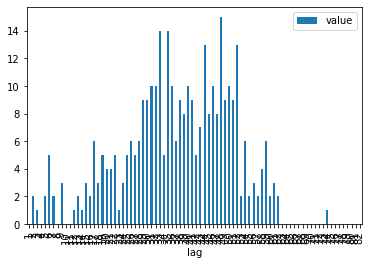

In [50]:
pd.read_sql("SELECT value, lag FROM nhs_totals_trust WHERE Name='WEST HERTFORDSHIRE HOSPITALS NHS TRUST'", DB.conn).groupby(['lag']).sum().plot(kind='bar')

## Public Health England

Data published by Public Health England:
    
- [Cases](https://coronavirus.data.gov.uk/downloads/csv/coronavirus-cases_latest.csv)
- [Deaths](https://coronavirus.data.gov.uk/downloads/csv/coronavirus-deaths_latest.csv)

In [51]:
#via https://stackoverflow.com/questions/61415090/python-pandas-handling-of-308-request
import requests
import io

def get_308_csv(url):
    datastr = requests.get(url, allow_redirects=True).text
    data_file = io.StringIO(datastr)
    _df = pd.read_csv(data_file)
    _df['Specimen date'] =  pd.to_datetime(_df['Specimen date'])
    return _df

In [52]:
phe_cases_url = 'https://coronavirus.data.gov.uk/downloads/csv/coronavirus-cases_latest.csv'
phe_cases_df = get_308_csv(phe_cases_url)

_table = f'phe_cases'
phe_cases_df.to_sql(_table, DB.conn, index=False, if_exists='replace')
    
phe_cases_df.head()

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:2712: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,Area name,Area code,Area type,Specimen date,Daily lab-confirmed cases,Previously reported daily cases,Change in daily cases,Cumulative lab-confirmed cases,Previously reported cumulative cases,Change in cumulative cases,Cumulative lab-confirmed cases rate
0,England,E92000001,Nation,2020-05-21,38.0,0.0,38.0,147745,146662.0,1083.0,263.9
1,South West,E12000009,Region,2020-05-21,3.0,NaN,NaN,7476,NaN,NaN,133.5
2,South East,E12000008,Region,2020-05-21,3.0,NaN,NaN,20816,NaN,NaN,227.9
3,London,E12000007,Region,2020-05-21,1.0,NaN,NaN,26683,NaN,NaN,299.5
4,East of England,E12000006,Region,2020-05-21,4.0,NaN,NaN,13558,NaN,NaN,218.6


In [53]:
pd.read_sql("SELECT * FROM phe_cases LIMIT 3", DB.conn)

,Area name,Area code,Area type,Specimen date,Daily lab-confirmed cases,Previously reported daily cases,Change in daily cases,Cumulative lab-confirmed cases,Previously reported cumulative cases,Change in cumulative cases,Cumulative lab-confirmed cases rate
0,England,E92000001,Nation,2020-05-21 00:00:00,38.0,0.0,38.0,147745,146662.0,1083.0,263.9
1,South West,E12000009,Region,2020-05-21 00:00:00,3.0,NaN,NaN,7476,NaN,NaN,133.5
2,South East,E12000008,Region,2020-05-21 00:00:00,3.0,NaN,NaN,20816,NaN,NaN,227.9


In [54]:
phe_deaths_url = 'https://coronavirus.data.gov.uk/downloads/csv/coronavirus-deaths_latest.csv'
phe_deaths_df = get_308_csv(phe_cases_url)

_table = f'phe_deaths'
phe_cases_df.to_sql(_table, DB.conn, index=False, if_exists='replace')

phe_deaths_df.head()

,Area name,Area code,Area type,Specimen date,Daily lab-confirmed cases,Previously reported daily cases,Change in daily cases,Cumulative lab-confirmed cases,Previously reported cumulative cases,Change in cumulative cases,Cumulative lab-confirmed cases rate
0,England,E92000001,Nation,2020-05-21,38.0,0.0,38.0,147745,146662.0,1083.0,263.9
1,South West,E12000009,Region,2020-05-21,3.0,NaN,NaN,7476,NaN,NaN,133.5
2,South East,E12000008,Region,2020-05-21,3.0,NaN,NaN,20816,NaN,NaN,227.9
3,London,E12000007,Region,2020-05-21,1.0,NaN,NaN,26683,NaN,NaN,299.5
4,East of England,E12000006,Region,2020-05-21,4.0,NaN,NaN,13558,NaN,NaN,218.6


In [55]:
pd.read_sql("SELECT * FROM phe_deaths LIMIT 3", DB.conn)

,Area name,Area code,Area type,Specimen date,Daily lab-confirmed cases,Previously reported daily cases,Change in daily cases,Cumulative lab-confirmed cases,Previously reported cumulative cases,Change in cumulative cases,Cumulative lab-confirmed cases rate
0,England,E92000001,Nation,2020-05-21 00:00:00,38.0,0.0,38.0,147745,146662.0,1083.0,263.9
1,South West,E12000009,Region,2020-05-21 00:00:00,3.0,NaN,NaN,7476,NaN,NaN,133.5
2,South East,E12000008,Region,2020-05-21 00:00:00,3.0,NaN,NaN,20816,NaN,NaN,227.9


### NHS - A&E

Monthly data:
https://www.england.nhs.uk/statistics/statistical-work-areas/ae-waiting-times-and-activity/ae-attendances-and-emergency-admissions-2019-20/

Hospital Episode Statistics:
https://digital.nhs.uk/data-and-information/publications/statistical/hospital-episode-statistics-for-admitted-patient-care-outpatient-and-accident-and-emergency-data

## Deployment via datasette

`datasette publish fly nhs_dailies.db --app="nhs-orgs"`

## Simple Chat

In [ ]:
# It takes tiny amounts of code to post s/thing from a notebook to an API and display a result


# Create some magic to call and API
from IPython.core.magic import register_cell_magic, register_line_magic
import requests
import pandas as pd

from urllib.parse import urlencode
    
_datasette_url = 'https://nhs-orgs.fly.dev/nhs_dailies/phe_cases.csv?{}'

@register_line_magic
def phe_cases(line):
    "Query datasette."
    payload = {'_sort': 'rowid',
               'Area name__contains': line,
               '_size': 'max'}
    _url =  _datasette_url.format(urlencode(payload))
    return pd.read_csv( _url)

In [ ]:
# Pass a string to the API via some magic and display the result

%phe_cases isle of wight

## Run as file

In [ ]:
!python3 uk_daily_deaths_nhs.py

## Looking Inside Downloaded Zip Files

In [ ]:
#https://techoverflow.net/2018/01/16/downloading-reading-a-zip-file-in-memory-using-python/
import zipfile

def download_extract_xml(url):
    """
    Download a ZIP file and extract its contents in memory
    yields (filename, file-like object) pairs
    """
    response = requests.get(url)
    with zipfile.ZipFile(io.BytesIO(response.content)) as thezip:
        for zipinfo in thezip.infolist():
            with thezip.open(zipinfo) as thefile:
                yield zipinfo.filename, thefile
                
r = download_extract_xml(ons_weekly_url)
for f in r:
    print(f)